In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Session 11. Ibex.csv.', sep = ";",decimal = ",", encoding= 'unicode_escape')
y = data.iloc[:,1] # ibex
x1 = data.iloc[:,2] # exchange
x2 = data.iloc[:,3] # short term
x3 = data.iloc[:,4] # long term

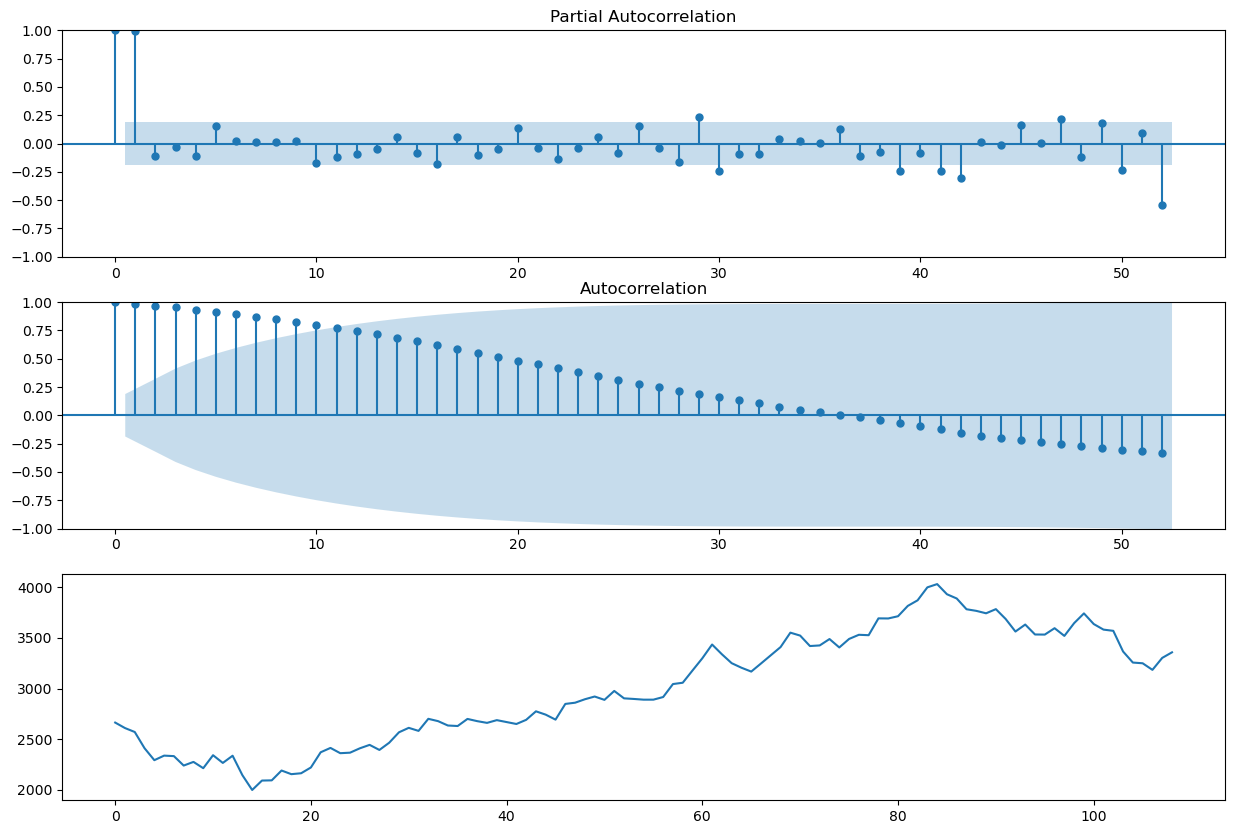

Regular differences:  1
Seasonal differences: 0


In [72]:
import statsmodels as sm
import pmdarima
from pmdarima.arima import ndiffs, nsdiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 52 # play with this parameter

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(y, lags = nlags, method="ols", ax=ax[0])
plot_acf(y, lags = nlags, ax=ax[1])
ax[2] = plt.plot(y)
plt.show()

# Tests
s = 52
d = ndiffs(y, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(y, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

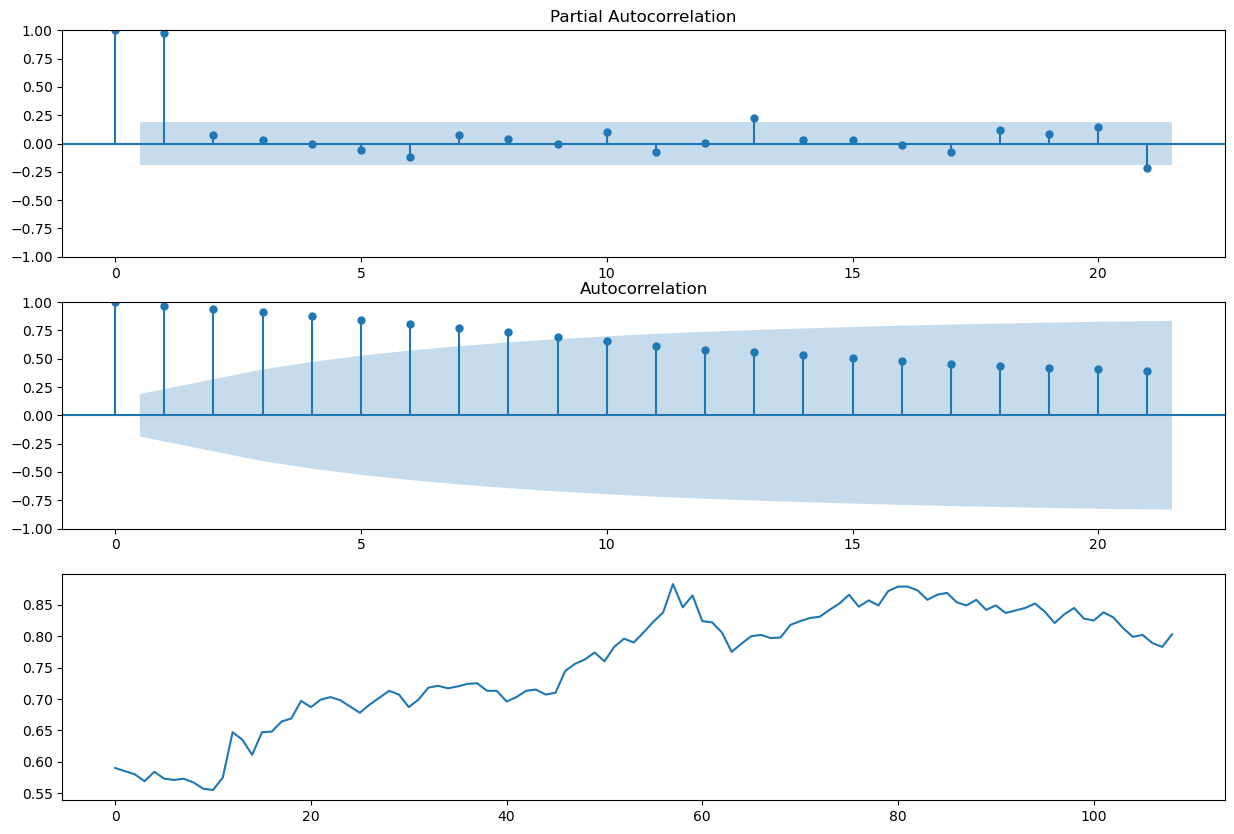

Regular differences:  1
Seasonal differences: 0


In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nlags = 50 # play with this parameter

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(x1, method="ols", ax=ax[0])
plot_acf(x1, ax=ax[1])
ax[2] = plt.plot(x1)
plt.show()

# Tests
s = 52
d = ndiffs(x1, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(x1, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

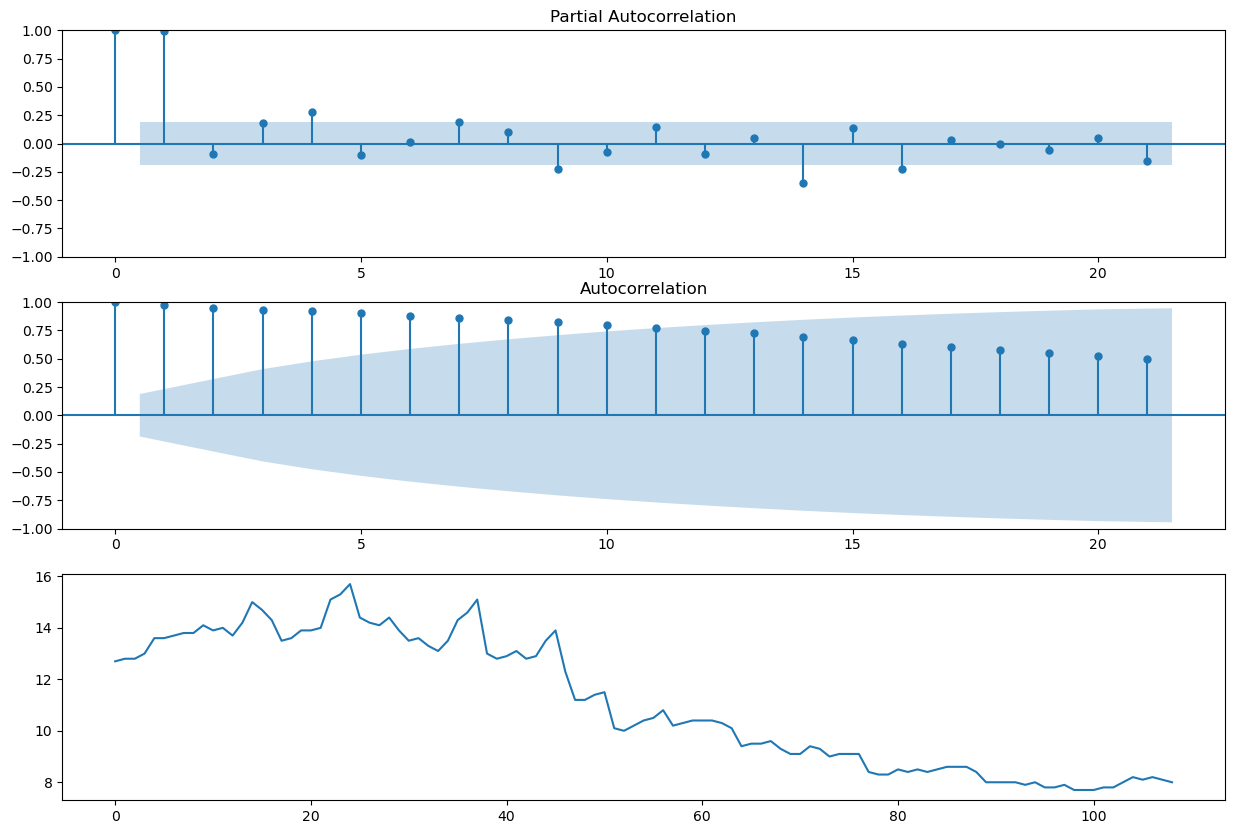

Regular differences:  1
Seasonal differences: 0


In [74]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(x2, method="ols", ax=ax[0])
plot_acf(x2, ax=ax[1])
ax[2] = plt.plot(x2)
plt.show()

# Tests
s = 52
d = ndiffs(x2, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(x2, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

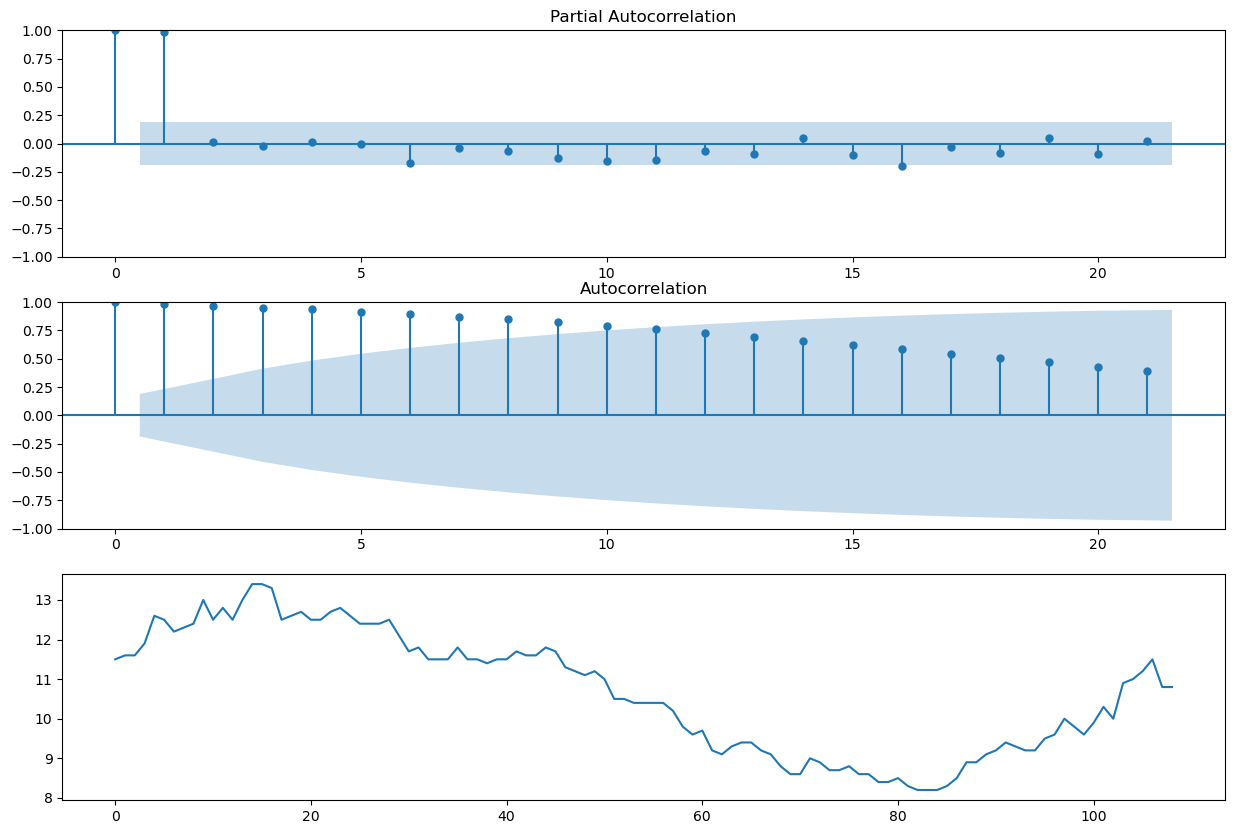

Regular differences:  1
Seasonal differences: 0


In [75]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(x3, method="ols", ax=ax[0])
plot_acf(x3, ax=ax[1])
ax[2] = plt.plot(x3)
plt.show()

# Tests
s = 52
d = ndiffs(x3, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(x3, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

In [76]:
import statsmodels.api as sm
from pmdarima.arima import ndiffs, nsdiffs
print('Regular difference:', ndiffs(y, alpha = 0.05, test = 'adf'))

box_test = sm.stats.acorr_ljungbox(y, lags=[20])
print("Ljung-Box: Statistic value", box_test.iloc[0,0], "p-value", box_test.iloc[0,1]) 

Regular difference: 1
Ljung-Box: Statistic value 1469.7690532502645 p-value 1.2169095890951355e-299


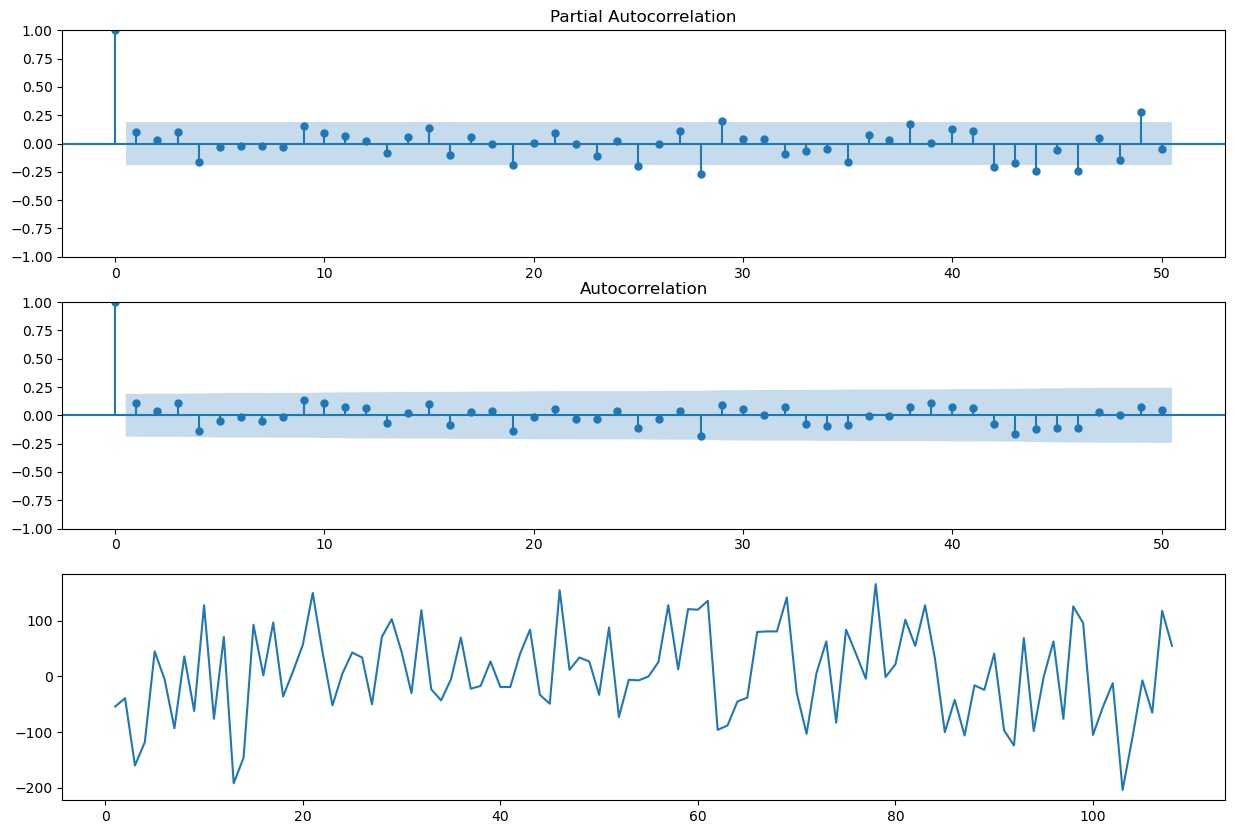

Regular differences:  0
Seasonal differences: 0


In [77]:
r = y.diff().dropna()

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(r, lags = nlags, method="ols", ax=ax[0])
plot_acf(r, lags = nlags, ax=ax[1])
ax[2] = plt.plot(r)
plt.show()

# Tests
s = 52
d = ndiffs(r, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(r, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

In [78]:
box_test = sm.stats.acorr_ljungbox(r, lags=[60])
print("Ljung-Box: Statistic value", box_test.iloc[0,0], "p-value", box_test.iloc[0,1])

Ljung-Box: Statistic value 58.692746106201554 p-value 0.5236021263208422


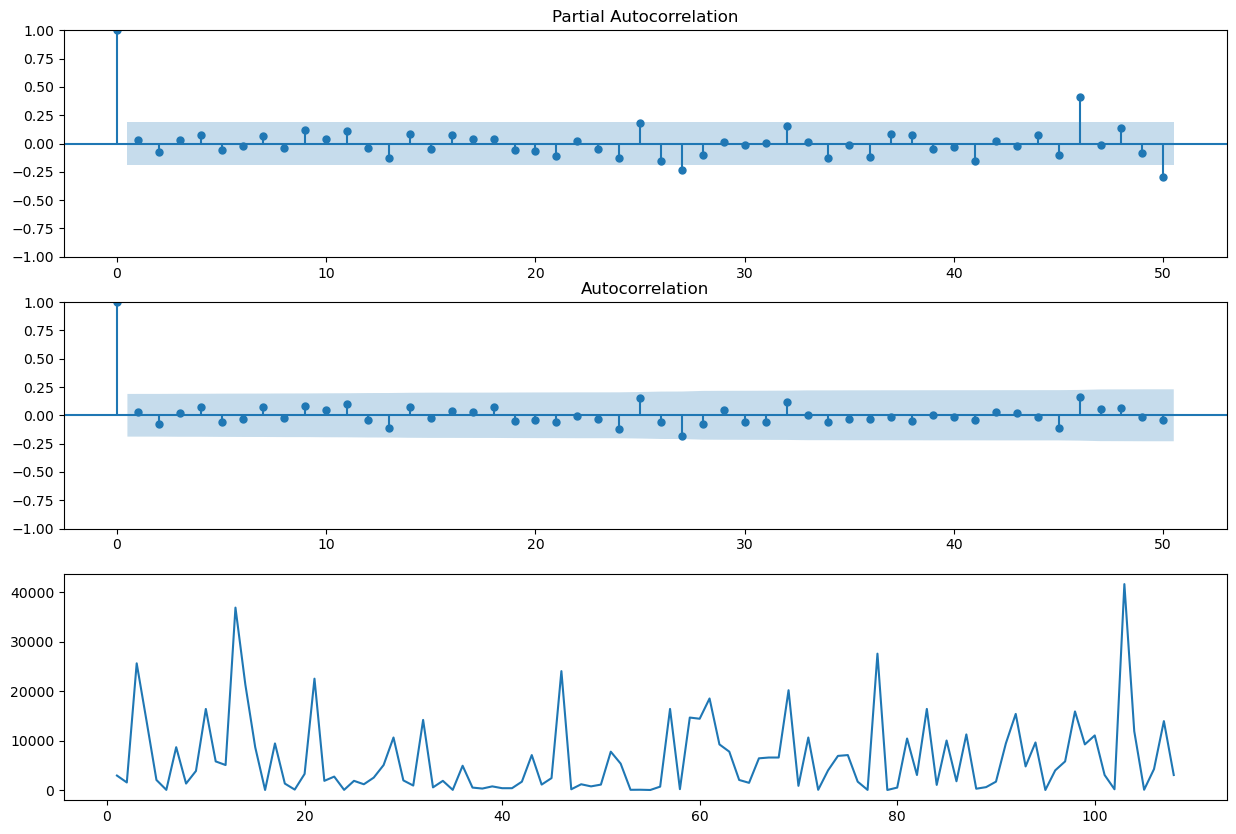

In [79]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(r**2, lags = nlags, method="ld", ax=ax[0])
plot_acf(r**2, lags = nlags, ax=ax[1])
ax[2] = plt.plot(r**2)
plt.show()

In [80]:
box_test = sm.stats.acorr_ljungbox(r**2, lags=[52])
print("Test:", box_test.iloc[0,0]) # Se parece a lo de R pero varía u npoco
print("p-value:", box_test.iloc[0,1]) # Se parece a lo de R pero varía un poco

Test: 37.4898439127991
p-value: 0.9351077925333496


In [81]:
from scipy.stats import shapiro

# Da lo mismo que en R
print("Shapiro test:", shapiro(r)[0])
print("Shapiro p-value: ", shapiro(r)[1])


Shapiro test: 0.9876301288604736
Shapiro p-value:  0.42447784543037415


In [82]:
# correlation matrix
pd.DataFrame({"IBEX":np.corrcoef([y, x1, x2, x3])[0],
             "Exchange Rate":np.corrcoef([y, x1, x2, x3])[1],
             "Short term rate":np.corrcoef([y, x1, x2, x3])[2],
             "Long term rate":np.corrcoef([y, x1, x2, x3])[3]},
            index = ["IBEX", "Exchange Rate","Short term rate",
                    "Long term rate"])

,IBEX,Exchange Rate,Short term rate,Long term rate
IBEX,1.000000,0.888865,-0.931820,-0.944159
Exchange Rate,0.888865,1.000000,-0.842729,-0.867561
Short term rate,-0.931820,-0.842729,1.000000,0.866474
Long term rate,-0.944159,-0.867561,0.866474,1.000000


In [83]:
x = pd.DataFrame({"Exchange Rate":x1, "Short term rate":x2, "Long term rate":x3})
x = sm.add_constant(pd.DataFrame(x))
# print(x)

reg1 = sm.OLS(y, x).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IBEX   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     626.1
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           8.03e-67
Time:                        16:24:50   Log-Likelihood:                -682.62
No. Observations:                 109   AIC:                             1373.
Df Residuals:                     105   BIC:                             1384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5231.6769    376.906     13.881      0.000    4484.341    5979.013
Exchange Rate     783.3436    288.440      2.716      0.008     211.421    1355.266
Short term rate   -88.7046     10.505     -8.444      0.000    -109.535     -67.874
Long term rate   -172.1635     18.923     -9.098      0.000    -209.685    -134.642
==============================================================================
Omnibus:                        2.633   Durbin-Watson:                   0.280
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.251
Skew:                          -0.238   Prob(JB):                        0.324
Kurtosis:                       2.481   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

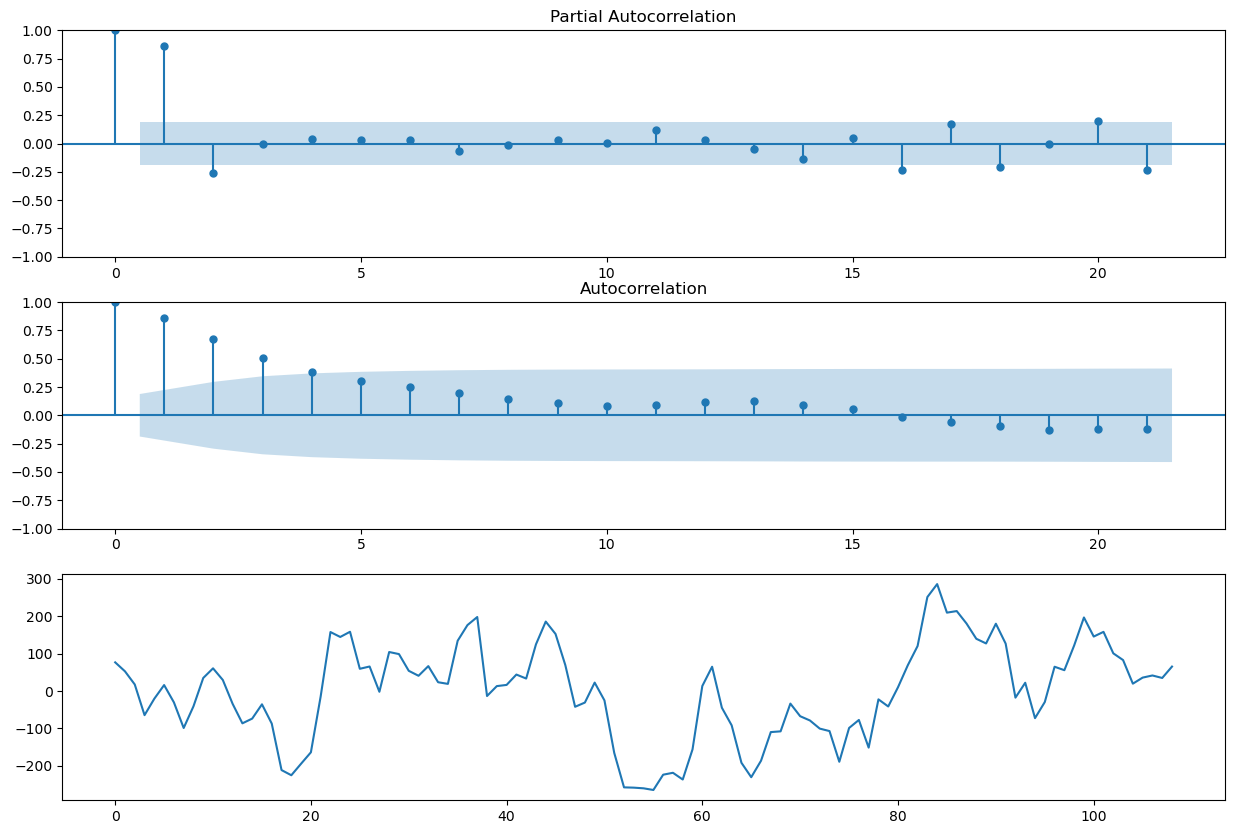

Regular differences:  1
Seasonal differences: 0


In [84]:
resi = reg1.resid

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(resi, method="ld", ax=ax[0])
plot_acf(resi, ax=ax[1])
ax[2] = plt.plot(resi)
plt.show()

# Tests
s = 52
d = ndiffs(resi, alpha = 0.05, test='adf')  # regular differences?
D = nsdiffs(resi, m = s, test='ocsb') # # seasonal differences?

print("Regular differences: ", d)
print('Seasonal differences:', D)

In [85]:
fit = sm.tsa.arima.ARIMA(resi, order = (2,0,0)).fit(method = 'innovations_mle')
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  109
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -606.676
Date:                Mon, 20 Feb 2023   AIC                           1221.353
Time:                        16:24:51   BIC                           1232.118
Sample:                             0   HQIC                          1225.718
                                - 109                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6215     33.515      0.138      0.890     -61.068      70.311
ar.L1          1.0665      0.094     11.335      0.000       0.882       1.251
ar.L2         -0.2448      0.093     -2.623      0.009      -0.428      -0.062
sigma2      3946.2446    596.578      6.615      0.000    2776.973    5115.516
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.95   Prob(JB):                         0.92
Heteroskedasticity (H):               1.12   Skew:                            -0.06
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

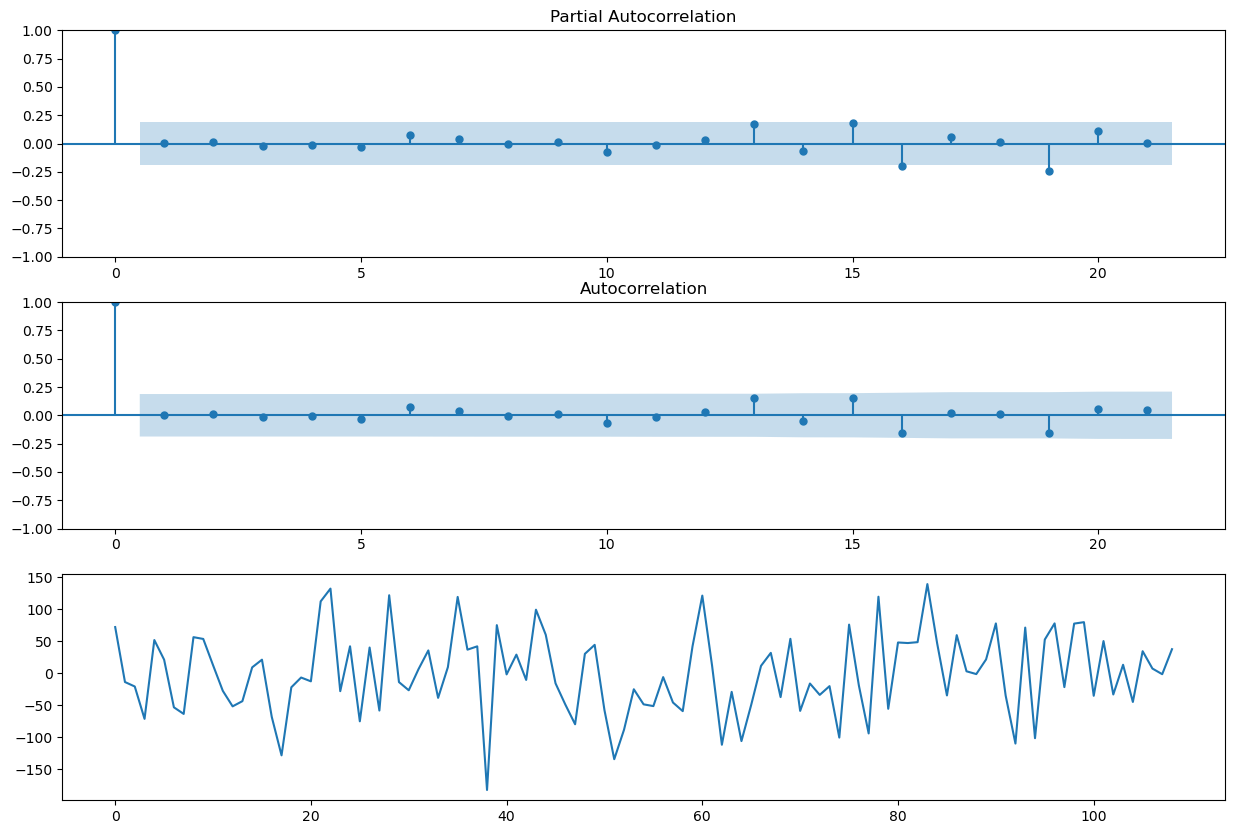

In [86]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(fit.resid, method="ld", ax=ax[0])
plot_acf(fit.resid, ax=ax[1])
ax[2] = plt.plot(fit.resid)
plt.show()

In [87]:
box_test = sm.stats.acorr_ljungbox(fit.resid, lags=[5])
print("Box test:", box_test.iloc[0,0]) # Se parece a lo de R 
print("p-value:", box_test.iloc[0,1]) # Se parece a lo de R

Box test: 0.18263088481993547
p-value: 0.9992895396070112


In [88]:
del(x['const'])
# print(x)

In [89]:
fit_total = sm.tsa.arima.ARIMA(endog = y, exog = x, order = (2,0,0)).fit(method = 'innovations_mle')
fit_total.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IBEX   No. Observations:                  109
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -595.667
Date:                Mon, 20 Feb 2023   AIC                           1205.334
Time:                        16:24:52   BIC                           1224.174
Sample:                             0   HQIC                          1212.974
                                - 109                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4493.1662    459.005      9.789      0.000    3593.534    5392.799
Exchange Rate     957.3423    366.842      2.610      0.009     238.346    1676.339
Short term rate   -10.7126     18.913     -0.566      0.571     -47.782      26.357
Long term rate   -192.6209     30.578     -6.299      0.000    -252.553    -132.688
ar.L1               1.0795      0.111      9.694      0.000       0.861       1.298
ar.L2              -0.1240      0.112     -1.106      0.269      -0.344       0.096
sigma2           3190.8777    501.851      6.358      0.000    2207.267    4174.488
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.84   Prob(JB):                         0.34
Heteroskedasticity (H):               1.62   Skew:                             0.35
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

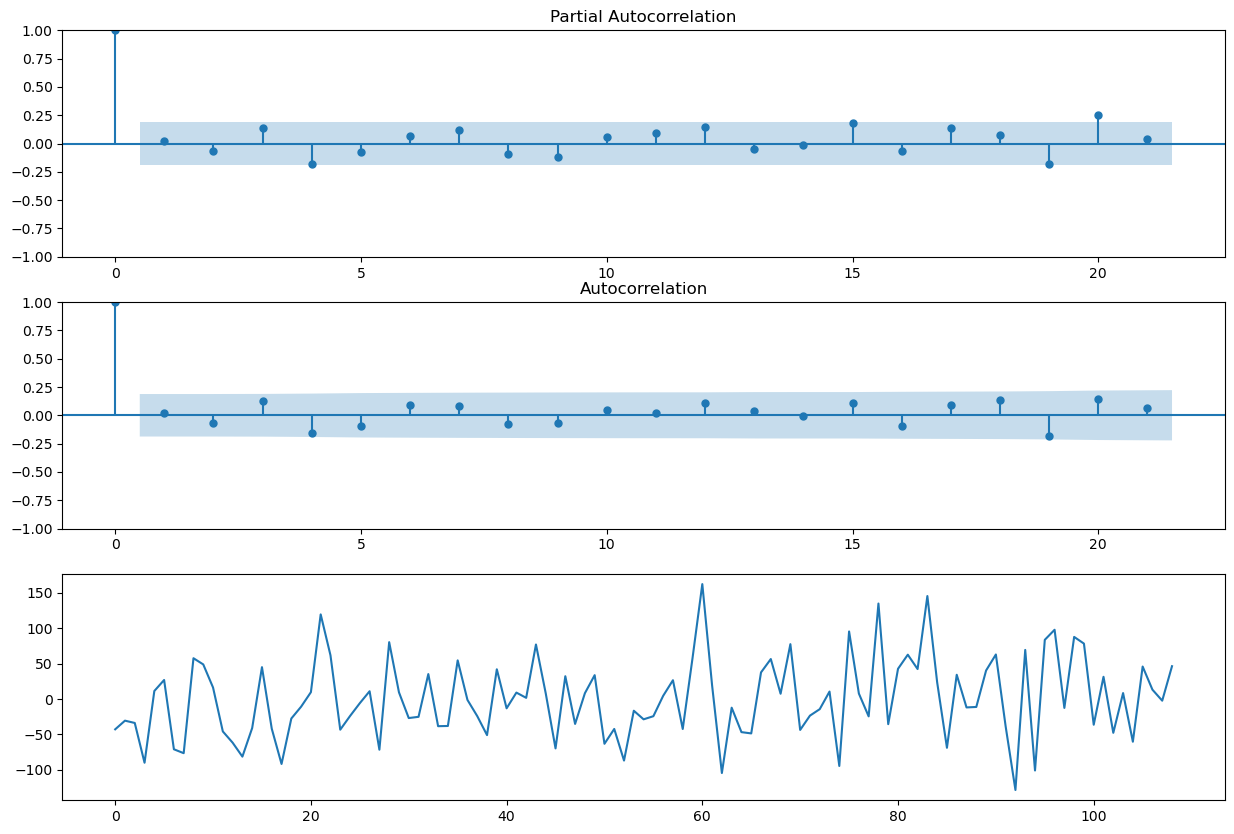

In [90]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(fit_total.resid, method="ld", ax=ax[0])
plot_acf(fit_total.resid, ax=ax[1])
ax[2] = plt.plot(fit_total.resid)
plt.show()

In [91]:
box_test = sm.stats.acorr_ljungbox(fit_total.resid, lags=[30])
print("Box test:", box_test.iloc[0,0]) # 
print("p-value:", box_test.iloc[0,1]) # 

Box test: 29.684919006531363
p-value: 0.4818723413541275


In [92]:
xx = pd.DataFrame({"Exchange Rate":x1, "Long term rate":x3})

xx = sm.add_constant(xx)

# Los coeficientes de la regresión coinciden
reg2 = sm.OLS(y, xx).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IBEX   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     543.2
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.95e-56
Time:                        16:24:53   Log-Likelihood:                -710.86
No. Observations:                 109   AIC:                             1428.
Df Residuals:                     106   BIC:                             1436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4435.4595    470.616      9.425      0.000    3502.418    5368.501
Exchange Rate   1676.1116    346.091      4.843      0.000     989.953    2362.271
Long term rate  -252.9438     21.056    -12.013      0.000    -294.689    -211.199
==============================================================================
Omnibus:                        3.392   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                2.837
Skew:                           0.286   Prob(JB):                        0.242
Kurtosis:                       2.454   Cond. No.                         395.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

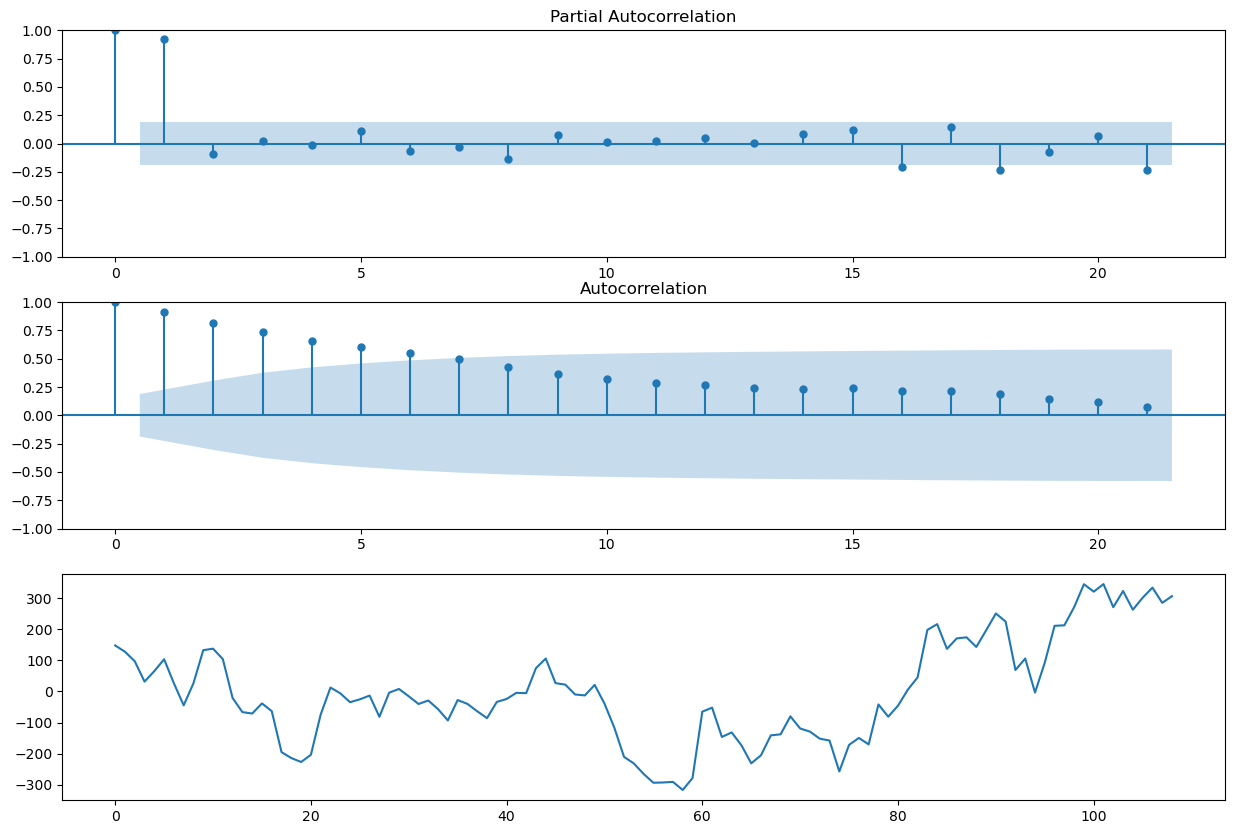

In [93]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(reg2.resid, method="ld", ax=ax[0])
plot_acf(reg2.resid, ax=ax[1])
ax[2] = plt.plot(reg2.resid)
plt.show()

In [94]:
del(xx['const'])
print(xx)

     Exchange Rate  Long term rate
0            0.590            11.5
1            0.585            11.6
2            0.580            11.6
3            0.569            11.9
4            0.584            12.6
..             ...             ...
104          0.799            11.0
105          0.802            11.2
106          0.789            11.5
107          0.783            10.8
108          0.803            10.8

[109 rows x 2 columns]


In [95]:
fit_total2 = sm.tsa.arima.ARIMA(endog = y, exog = xx, order = (1,0,0)).fit(method = 'innovations_mle')
fit_total2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IBEX   No. Observations:                  109
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -596.465
Date:                Mon, 20 Feb 2023   AIC                           1202.931
Time:                        16:24:54   BIC                           1216.387
Sample:                             0   HQIC                          1208.388
                                - 109                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4570.9048    451.331     10.128      0.000    3686.313    5455.496
Exchange Rate    881.1285    358.421      2.458      0.014     178.636    1583.621
Long term rate  -204.1997     25.389     -8.043      0.000    -253.961    -154.438
ar.L1              0.9665      0.024     40.113      0.000       0.919       1.014
sigma2          3234.0994    484.832      6.671      0.000    2283.846    4184.352
===================================================================================
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.28   Prob(JB):                         0.41
Heteroskedasticity (H):               1.51   Skew:                             0.31
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

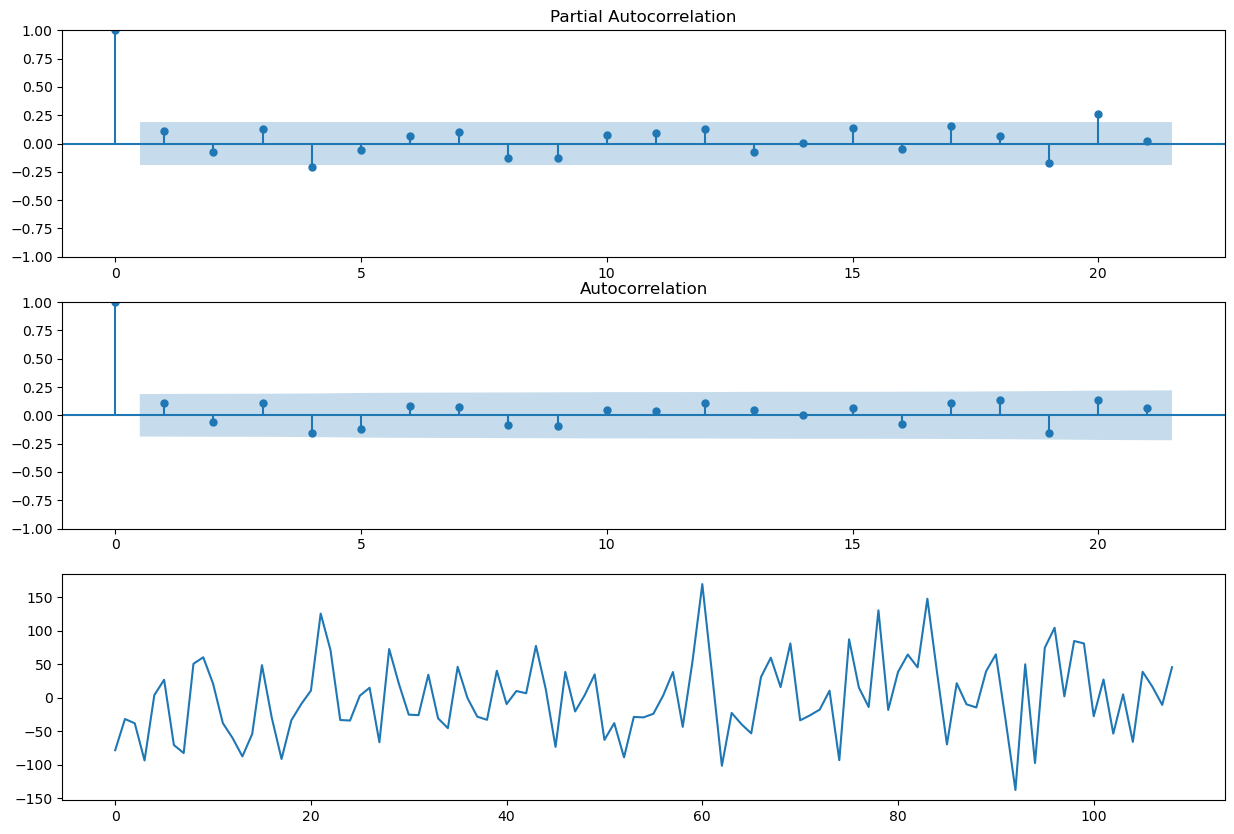

In [96]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(fit_total2.resid, method="ld", ax=ax[0])
plot_acf(fit_total2.resid, ax=ax[1])
ax[2] = plt.plot(fit_total2.resid)
plt.show()

In [97]:
print("Box Test residuals")
box_test = sm.stats.acorr_ljungbox(fit_total2.resid, lags=[30])
print("X_squared:", box_test.iloc[0,0]) # Se parece a lo de R 
print("p-value:", box_test.iloc[0,1]) # Se parece a lo de R

print("\nBox Test squared residuals")
box_test = sm.stats.acorr_ljungbox(fit_total2.resid **2, lags=[30])
print("X_squared:", box_test.iloc[0,0]) # Se parece a lo de R 
print("p-value:", box_test.iloc[0,1]) # Se parece a lo de R

print("\nShapiro test", shapiro(fit_total2.resid)[0])
print("Shapiro test (p-value)", shapiro(fit_total2.resid)[1])

Box Test residuals
X_squared: 28.36658855571479
p-value: 0.5510172254116275

Box Test squared residuals
X_squared: 31.663464588087688
p-value: 0.3833406622794653

Shapiro test 0.9888193011283875
Shapiro test (p-value) 0.5069789290428162


In [98]:
pred_x = pd.DataFrame({"Exchange Rate":0.781, "Long term rate":10.76}, index = [0])
prediction = fit_total2.forecast(exog=pred_x)
#prediction2 = fit_total2.predict(exog=pred_x, start = len(xx))
print('Prediction:', prediction)
#print('Prediction 2:', prediction2)

Prediction: 109    3336.258958
dtype: float64


In [99]:
# just in case we need to do the same taking differences first

dy = y.diff().dropna()
z1 = x1.diff().dropna()
z2 = x2.diff().dropna()
z3 = x3.diff().dropna()

In [100]:
pd.DataFrame({"IBEX_diff":np.corrcoef([dy, z1, z2, z3])[0],
             "Exchange Rate_diff":np.corrcoef([dy, z1, z2, z3])[1],
             "Short term rate_diff":np.corrcoef([dy, z1, z2, z3])[2],
             "Long term rate_diff":np.corrcoef([dy, z1, z2, z3])[3]},
            index = ["IBEX_diff", "Exchange Rate_diff","Short term rate_diff",
                    "Long term rate_diff"])

,IBEX_diff,Exchange Rate_diff,Short term rate_diff,Long term rate_diff
IBEX_diff,1.000000,0.248638,-0.327315,-0.683674
Exchange Rate_diff,0.248638,1.000000,-0.183727,-0.145037
Short term rate_diff,-0.327315,-0.183727,1.000000,0.446403
Long term rate_diff,-0.683674,-0.145037,0.446403,1.000000


In [101]:
z = pd.DataFrame({"Exchange Rate_diff":z1, "Short term rate_diff":z2, "Long term rate_diff":z3})
z = sm.add_constant(pd.DataFrame(z))

# Los coeficientes de la regresión coinciden
reg2 = sm.OLS(dy, z).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IBEX   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     33.34
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.51e-15
Time:                        16:24:55   Log-Likelihood:                -590.33
No. Observations:                 108   AIC:                             1189.
Df Residuals:                     104   BIC:                             1199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.5640      5.675      0.628      0.531      -7.689      14.817
Exchange Rate_diff     767.1516    360.198      2.130      0.036      52.865    1481.438
Short term rate_diff    -0.9214     14.469     -0.064      0.949     -29.613      27.770
Long term rate_diff   -200.5001     23.852     -8.406      0.000    -247.799    -153.201
==============================================================================
Omnibus:                        1.564   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.162
Skew:                           0.243   Prob(JB):                        0.559
Kurtosis:                       3.149   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

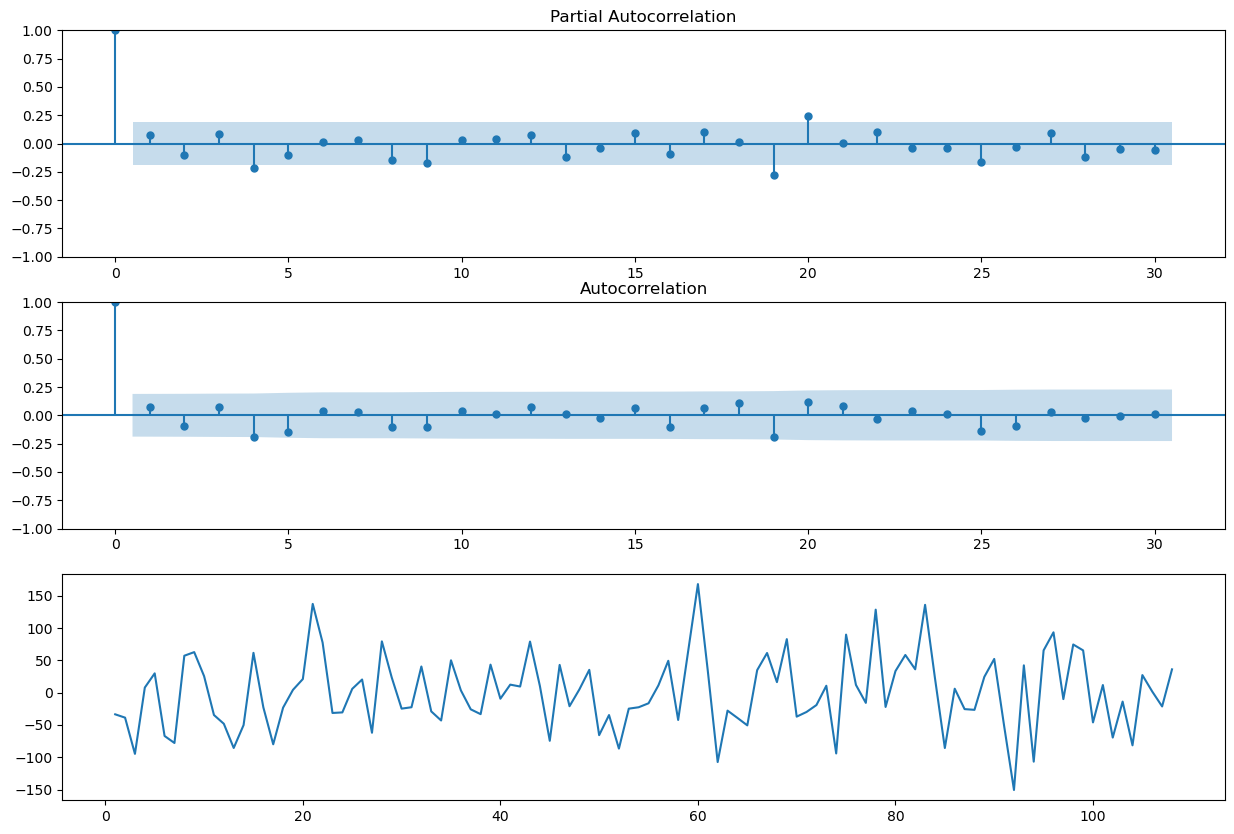

Box test residuals: 28.653827735101892
p-value: 0.5358309179196281
Box test squared residuals: 27.73639159765211
p-value: 0.5844036255208755


In [102]:
resi = reg2.resid

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(resi, lags = 30, method="ols", ax=ax[0])
plot_acf(resi, lags = 30, ax=ax[1])
ax[2] = plt.plot(resi)
plt.show()

box_test = sm.stats.acorr_ljungbox(resi, lags=[30])
box_test2 = sm.stats.acorr_ljungbox(resi**2, lags=[30])
print("Box test residuals:", box_test.iloc[0,0]) # 
print("p-value:", box_test.iloc[0,1]) # 
print("Box test squared residuals:", box_test2.iloc[0,0]) # 
print("p-value:", box_test2.iloc[0,1]) # 

In [103]:
print('Regular difference:',ndiffs(resi, alpha = 0.05, test = 'adf'))
# Ahora sí lo hace bien, sale 0 como en R

Regular difference: 0
